## Math 425 Computation Linear Algebra


### Module One, A1
#### Covering Linear Indepence, Span, Homogenous coordinates, Linear Transformation and Mapping.
#### Brent A. Thorne brentathorne@gmail.com

In [2]:
# environment setup, try to make it clear which library I'm using for what
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

### 1. Let $u=\begin{bmatrix}1\\0\\2\\1\end{bmatrix}$, $v=\begin{bmatrix}-2\\3\\-1\\1\end{bmatrix}$ and $w=\begin{bmatrix}2\\-2\\1\\-1\end{bmatrix}.$

(a) Show that the set {u,v,w} is a linearly independent set.

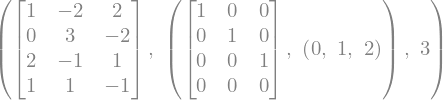

In [73]:
#P1 a)
u = Matrix([1,0,2,1])
v = Matrix([-2,3,-1,1])
w = Matrix([2,-2,1,-1])
u,v,w
A = u.row_join(v).row_join(w)
A, A.rref(), A.rank() # full rank system

(b) Suppose $b=\begin{bmatrix}a\\b\\c\\d\end{bmatrix}$ lies in Span{$u,v,w$}.  What conditions must $a$,$b$,$c$,$d$ satisfy?

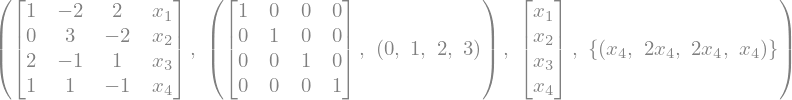

In [74]:
#P1 b) #fix me, what's wrong here? this actaully looks rather correct
#s = sym.symbols('a b c d')
s = sym.symbols('x1 x2 x3 x4')
b = Matrix(s)

Au = A.row_join(b)
Au, Au.rref(), b, sym.linsolve((A,b), s) # Make the computer work for this puny human.

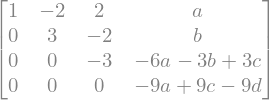

In [4]:
Au.echelon_form() # certainly looks that way, ask Henry what he was after here.
# must be consistant (make equal to zero, consider general solution)

### 2. Give the 4x4 homegeneous matrix that rotate point in $\mathbb{R^3}$ about the z-axis through an angle of $\theta=-\frac\pi 6$, then translated the result by $p=(5,-1,1)$.

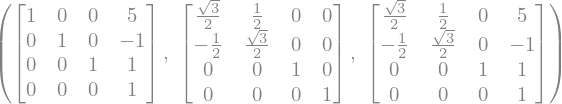

In [81]:
#P2
v=Matrix([1,2,3,1])
thetaZ = -sym.pi/6
Tz = Matrix([[sym.cos(thetaZ),-sym.sin(thetaZ),0,0],\
            [sym.sin(thetaZ),sym.cos(thetaZ),0,0],\
            [0,0,1,0],\
            [0,0,0,1]])
Tp = Matrix([[1,0,0,5], [0,1,0,-1], [0,0,1,1], [0,0,0,1]])
Tp,Tz, (Tp*Tz) #.n(2)

### 3. The linear transformation $T(x)=Ax$ maps $\begin{bmatrix}1\\3\end{bmatrix}$ and $\begin{bmatrix}2\\7\end{bmatrix}$ into $\begin{bmatrix}1\\1\end{bmatrix}$ and $\begin{bmatrix}3\\1\end{bmatrix}$, respectively.

Find $T\begin{bmatrix}2\\8\end{bmatrix}$. 

In [67]:
#P3 # work on this!!! write this up as a detailed tutorial
c = sym.symbols('c1 c2')
x = Matrix([2,8])
A = Matrix([[1,2],[3,7]])
y = Matrix([[1,3],[1,1]])
C = Matrix(list(sym.linsolve((A,x), c))).T
y*C

display(Latex(f'$T{sym.latex(x)}={sym.latex(y)}{sym.latex(C)}={sym.latex(y*C)}$'))

<IPython.core.display.Latex object>

In [65]:
c = sym.symbols('c1 c2')
Au = A.row_join(x)
display(Latex(f'$T(x)=Ax$'))
display(Latex(f'${sym.latex(x)}=\
{c[0]}*{sym.latex(A.col(0))}+{c[1]}*{sym.latex(A.col(1))}$\
$\Rightarrow$ ${sym.latex(Au)}$ $\sim$ ${sym.latex(Au.rref(pivots=False))}$'))
display(Latex(f'$T{sym.latex(x)}=\
T[{(C[0])}*{sym.latex(A.col(0))}+{C[1]}*{sym.latex(A.col(1))}]$\
=${(C[0])}*{sym.latex(y.col(0))}+{C[1]}*{sym.latex(y.col(1))}]$\
=${sym.latex(C[0]*y.col(0)+C[1]*y.col(1))}$'))  #very verbose

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [68]:
A= Matrix([[-2,1],[4,-1]])
A*x

ask for practice problems,
lay 1.8, p17-20

### 4.

(a) Find $k$ such that the linear transformation $T:\mathbb{R^3}\rightarrow\mathbb{R^2}$ with the standard matrix $A=\begin{bmatrix}-2&&10&&-8\\-2&&10&&-15.5+k\end{bmatrix}$ is onto.

<IPython.core.display.Latex object>

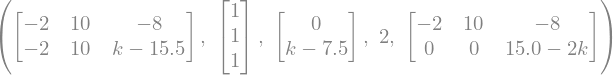

In [84]:
#P4 a)
k = sym.symbols('k')

A= Matrix([[-2,10,-8],[-2,10,-15.5+k]])
X = Matrix([1,1,1])

display(Latex(f'Solution when $k$ not equal $7.5$.'))
A,X, A*X, A.rank(), A.echelon_form() 

(b) $S:\mathbb{R^2}\rightarrow\mathbb{R^2}$ and $T:\mathbb{R^2}\rightarrow\mathbb{R^3}$ are linear transforms with $S(x_1,x_2)=(x_1+x_2, 4x_1+5x_2)$ and $T(x_1,x_2)=(x_1-2x_2,-x_1+3x_2,3x_1-2x_2)$.

Show that the mapping $x\mapsto T(S(x))$ is a linear transformation (from $\mathbb{R^2}$ to $\mathbb{R^3}$).

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

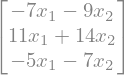

In [89]:
#P4 b)  *add more detail, think about this more
T = Matrix([[1,-2],[-1,3],[3,-2]])
S = Matrix([[1,1],[4,5]])
x = Matrix(sym.symbols('x1 x2'))
T,S, T*S*x
display(Latex(f'$T(S(x))=T*S*x={sym.latex(T)}*{sym.latex(S)}*{sym.latex(x)}={sym.latex(T*S*x)}$'))
display(Latex('Actually needed to show $T(S(cx+y)=cT(S(x)+T(S(y))))$'))
T*S*x # by inspection R^2 -> R^3

### Appendix. Practice problems

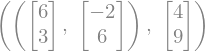

In [94]:
#P1.8.17
u = Matrix([5,2])
v = Matrix([1,3])
yu = Matrix([2,1])
yv = Matrix([-1,3])

(3*yu,2*yv), 3*yu+2*yv

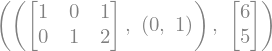

In [99]:
#P1.8.18
x1, x2 = sym.symbols('x1 x2')
u,v,w = sym.symbols('u v w')
Tu,Tv,Tw = sym.symbols('Tu Tv Tw')
#w = u-2*v
u= 2*x1+3*x2
v= -x1
w = 3*x2

Tu = 2*x1-x2
Tv = 2*x1+2*x2

M = Matrix([[2,-1,0],[3,0,3]])   #u,v,w
M.rref(), 1*Matrix([2,1])+2*Matrix([2,2])

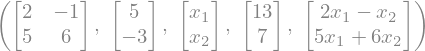

In [102]:
#P1.8.19
A = Matrix([[2,-1],[5,6]])
x = Matrix([5,-3])
xx = Matrix(sym.symbols('x1 x2'))
A, x, xx, A*x, A*xx

In [ ]:
#P1.9.20
# finish me!!

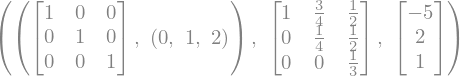

In [17]:
#S4.44 PP1
b1 = Matrix([1,0,0])
b2 = Matrix([-3,4,0])
b3 = Matrix([3,-6,3])
x = Matrix([-8,2,3])

b = Matrix.hstack(b1,b2,b3) # a better way
b.rref(), b.inv(), b.inv()*x

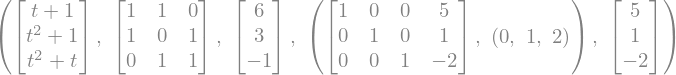

In [41]:
#S4.44 PP2
t = sym.symbols('t')
B = Matrix([[1+t],[1+t**2],[t+t**2]])
M = Matrix([[1,1,0],[1,0,1],[0,1,1]])
p = Matrix([6,3,-1])
B, M, p, Matrix.hstack(M,p).rref(), M.inv()*p